# import the data

In [527]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, KFold
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.svm import SVC, LinearSVC

In [528]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [529]:
data = pd.read_excel('/content/drive/MyDrive/DATA_3105/ECON3015_PORJECT.xlsx')
data

,ID,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return,Excess Return,Systematic Risk,Total Risk,Abs. Win Rate,Rel. Win Rate,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
0,1,1.000,0.000,0.000,0.000,0.000,0.000,0.139,0.010,1.33,0.149,0.663,0.525,0.531875,0.478116,0.738015,0.800000,0.52,0.411765
1,2,0.000,1.000,0.000,0.000,0.000,0.000,0.143,0.010,1.17,0.108,0.663,0.650,0.549712,0.487595,0.571579,0.412231,0.52,0.764706
2,3,0.000,0.000,1.000,0.000,0.000,0.000,0.173,0.018,1.30,0.144,0.638,0.513,0.692625,0.629895,0.703051,0.756879,0.44,0.376471
3,4,0.000,0.000,0.000,1.000,0.000,0.000,0.096,-0.002,1.39,0.144,0.613,0.475,0.324351,0.255634,0.800000,0.756046,0.36,0.270588
4,5,0.000,0.000,0.000,0.000,1.000,0.000,0.096,0.001,1.04,0.087,0.725,0.538,0.326615,0.306501,0.432452,0.209289,0.72,0.447059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,59,0.200,0.200,0.200,0.000,0.200,0.200,0.171,0.022,0.94,0.100,0.700,0.638,0.685397,0.706792,0.322843,0.329431,0.64,0.729412
59,60,0.200,0.200,0.000,0.200,0.200,0.200,0.153,0.018,0.88,0.087,0.725,0.638,0.595786,0.631599,0.259952,0.204156,0.72,0.729412
60,61,0.200,0.000,0.200,0.200,0.200,0.200,0.156,0.018,0.97,0.104,0.663,0.525,0.612546,0.631119,0.359730,0.368958,0.52,0.411765
61,62,0.000,0.200,0.200,0.200,0.200,0.200,0.161,0.018,0.98,0.094,0.688,0.663,0.635785,0.634402,0.362039,0.277221,0.60,0.800000


In [530]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID                                       63 non-null     int64  
 1    Large B/P                               63 non-null     float64
 2    Large ROE                               63 non-null     float64
 3    Large S/P                               63 non-null     float64
 4    Large Return Rate in the last quarter   63 non-null     float64
 5    Large Market Value                      63 non-null     float64
 6    Small systematic Risk                   63 non-null     float64
 7   Annual Return                            63 non-null     float64
 8   Excess Return                            63 non-null     float64
 9   Systematic Risk                          63 non-null     float64
 10  Total Risk                               63 non-null

In [531]:
data =  data.drop(data.columns[[0,7,8,9,10,11,12]], axis=1)
data

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
0,1.000,0.000,0.000,0.000,0.000,0.000,0.531875,0.478116,0.738015,0.800000,0.52,0.411765
1,0.000,1.000,0.000,0.000,0.000,0.000,0.549712,0.487595,0.571579,0.412231,0.52,0.764706
2,0.000,0.000,1.000,0.000,0.000,0.000,0.692625,0.629895,0.703051,0.756879,0.44,0.376471
3,0.000,0.000,0.000,1.000,0.000,0.000,0.324351,0.255634,0.800000,0.756046,0.36,0.270588
4,0.000,0.000,0.000,0.000,1.000,0.000,0.326615,0.306501,0.432452,0.209289,0.72,0.447059
...,...,...,...,...,...,...,...,...,...,...,...,...
58,0.200,0.200,0.200,0.000,0.200,0.200,0.685397,0.706792,0.322843,0.329431,0.64,0.729412
59,0.200,0.200,0.000,0.200,0.200,0.200,0.595786,0.631599,0.259952,0.204156,0.72,0.729412
60,0.200,0.000,0.200,0.200,0.200,0.200,0.612546,0.631119,0.359730,0.368958,0.52,0.411765
61,0.000,0.200,0.200,0.200,0.200,0.200,0.635785,0.634402,0.362039,0.277221,0.60,0.800000


In [532]:
data['Rel. Win Rate.1'].describe()

count    63.000000
mean      0.547899
std       0.159468
min       0.200000
25%       0.411765
50%       0.552941
75%       0.694118
max       0.800000
Name: Rel. Win Rate.1, dtype: float64

In [533]:
data['Total Risk.1'].describe()

count    63.000000
mean      0.391749
std       0.136653
min       0.200000
25%       0.297324
50%       0.368958
75%       0.457749
max       0.800000
Name: Total Risk.1, dtype: float64

In [534]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 12 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0    Large B/P                               63 non-null     float64
 1    Large ROE                               63 non-null     float64
 2    Large S/P                               63 non-null     float64
 3    Large Return Rate in the last quarter   63 non-null     float64
 4    Large Market Value                      63 non-null     float64
 5    Small systematic Risk                   63 non-null     float64
 6   Annual Return.1                          63 non-null     float64
 7   Excess Return.1                          63 non-null     float64
 8   Systematic Risk.1                        63 non-null     float64
 9   Total Risk.1                             63 non-null     float64
 10  Abs. Win Rate.1                          63 non-null

# Decision tree model


In [535]:
#
X = data.iloc[:, 0:6]
y = data['Rel. Win Rate.1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [536]:
# Define the decision tree regressor model
model = DecisionTreeRegressor(random_state=100)

# Train the model using k-fold cross-validation to tune the hyperparameters
kf = KFold(n_splits=7, shuffle=True, random_state=100)


In [537]:
# Define a function to compute the feature importance weights
def compute_feature_weights(model, feature_names):
    importances = model.feature_importances_
    weights = importances / importances.sum()
    feature_weights = pd.Series(weights, index=feature_names, name='Feature_weight')
    return feature_weights



In [538]:
# Perform k-fold cross-validation to tune the hyperparameters
best_score = float('-inf')
for max_depth in range(1, 11):
    for min_samples_split in range(2, 11):
        for min_samples_leaf in range(1, 6):
            model.set_params(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
            scores = []
for train_idx, val_idx in kf.split(X_train):
  X_train_fold, y_train_fold = X_train.iloc[train_idx], y_train.iloc[train_idx]
  X_val_fold, y_val_fold = X_train.iloc[val_idx], y_train.iloc[val_idx]
  model.fit(X_train_fold, y_train_fold)
  scores.append(model.score(X_val_fold, y_val_fold))



In [539]:
# Compute the mean cross-validation score and update the best hyperparameters if necessary
mean_score = np.mean(scores)
if mean_score > best_score:
  best_score = mean_score
  best_params = {'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

In [540]:
best_score

0.41624755363493765

In [541]:
best_params

{'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 5}

In [542]:
model.set_params(**best_params)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                      random_state=100)

In [543]:
test_score = model.score(X_test, y_test)

In [544]:
feature_names = X_train.columns
feature_weights = compute_feature_weights(model, feature_names)

In [545]:
normalized_weights = feature_weights / feature_weights.sum()

In [546]:
print('Best hyperparameters:', best_params)
print('Cross-validation score:', best_score)
print('Test set score:', test_score)
print('Feature weights:')
print( feature_weights)

Best hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 5}
Cross-validation score: 0.41624755363493765
Test set score: 0.3799915889824823
Feature weights:
 Large B/P                                 0.063928
 Large ROE                                 0.844526
 Large S/P                                 0.000000
 Large Return Rate in the last quarter     0.000000
 Large Market Value                        0.083395
 Small systematic Risk                     0.008151
Name: Feature_weight, dtype: float64


In [547]:
for i, feature in enumerate(X.columns):
    print(f"{feature}: {feature_weights[i]}")

 Large B/P : 0.06392818888924755
 Large ROE : 0.8445260351026531
 Large S/P : 0.0
 Large Return Rate in the last quarter : 0.0
 Large Market Value : 0.08339502744130445
 Small systematic Risk: 0.008150748566794834


In [548]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute the mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print('Mean squared error:', mse)
print('Coefficient of determination (R^2):', r2)

Mean squared error: 0.015844165720586886
Coefficient of determination (R^2): 0.3799915889824823


## DT classification


In [549]:
data['Rel. Win Rate.1'] = data['Rel. Win Rate.1'].apply(lambda x: "H" if x > 0.552941 else 'L')
data.head()

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk,Annual Return.1,Excess Return.1,Systematic Risk.1,Total Risk.1,Abs. Win Rate.1,Rel. Win Rate.1
0,1.0,0.0,0.0,0.0,0.0,0.0,0.531875,0.478116,0.738015,0.800000,0.52,L
1,0.0,1.0,0.0,0.0,0.0,0.0,0.549712,0.487595,0.571579,0.412231,0.52,H
2,0.0,0.0,1.0,0.0,0.0,0.0,0.692625,0.629895,0.703051,0.756879,0.44,L
3,0.0,0.0,0.0,1.0,0.0,0.0,0.324351,0.255634,0.800000,0.756046,0.36,L
4,0.0,0.0,0.0,0.0,1.0,0.0,0.326615,0.306501,0.432452,0.209289,0.72,L


In [550]:
data['Rel. Win Rate.1'].value_counts()

H    34
L    29
Name: Rel. Win Rate.1, dtype: int64

In [551]:
X2 = data.iloc[:, 0:6]
y2 = data['Rel. Win Rate.1']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.4, random_state=100)

In [552]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [553]:
#apply the grid research using K-fold validation 

# Define the decision tree model
dt_model = DecisionTreeClassifier(random_state=100)

# Define the hyperparameters to tune
params = {'max_depth': [2, 4, 6, 8], 'min_samples_split': [2, 4, 6, 8]}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(dt_model, params, cv=7)
grid_search.fit(X2_train, y2_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best score for DT: ", grid_search.best_score_)

Best hyperparameters: {'max_depth': 2, 'min_samples_split': 2}
Best score for DT:  0.8904761904761905


In [554]:
best_params = grid_search.best_params_

In [555]:
dt_model

DecisionTreeClassifier(random_state=100)

In [556]:
from sklearn.metrics import accuracy_score,  classification_report

In [557]:
# Train decision tree classifier on entire dataset using best parameters
clf = DecisionTreeClassifier(random_state=100, **best_params)
# clf = DecisionTreeClassifier(random_state=100, max_depth = 3)
clf.fit(X2_train, y2_train)

# Predict classes for testing set
y2_pred_dt2 = clf.predict(X_test)


In [558]:
from sklearn.model_selection import cross_val_score
clf_cv = cross_val_score(estimator = clf, X = X2, y = y2, cv=7)   # entire data
display(clf_cv, clf_cv.mean(), clf_cv.std())  

array([1.        , 0.88888889, 0.88888889, 0.77777778, 1.        ,
       0.88888889, 0.88888889])

0.9047619047619049

0.07098628499999333

In [559]:
accuracy = accuracy_score(y2_test, y2_pred_dt2)
report = classification_report(y2_test, y2_pred_dt2)
print("Accuracy:", accuracy)
print("Classification Report:", report)

Accuracy: 0.8846153846153846
Classification Report:               precision    recall  f1-score   support

           H       0.93      0.87      0.90        15
           L       0.83      0.91      0.87        11

    accuracy                           0.88        26
   macro avg       0.88      0.89      0.88        26
weighted avg       0.89      0.88      0.89        26



In [560]:
display(clf.feature_importances_, X2_train.columns)

array([0.06135987, 0.89867548, 0.        , 0.        , 0.03996465,
       0.        ])

Index([' Large B/P ', ' Large ROE ', ' Large S/P ',
       ' Large Return Rate in the last quarter ', ' Large Market Value ',
       ' Small systematic Risk'],
      dtype='object')

In [561]:
normalized_weights = clf.feature_importances_ / clf.feature_importances_.sum()

In [562]:
display(normalized_weights, X2_train.columns)

array([0.06135987, 0.89867548, 0.        , 0.        , 0.03996465,
       0.        ])

Index([' Large B/P ', ' Large ROE ', ' Large S/P ',
       ' Large Return Rate in the last quarter ', ' Large Market Value ',
       ' Small systematic Risk'],
      dtype='object')

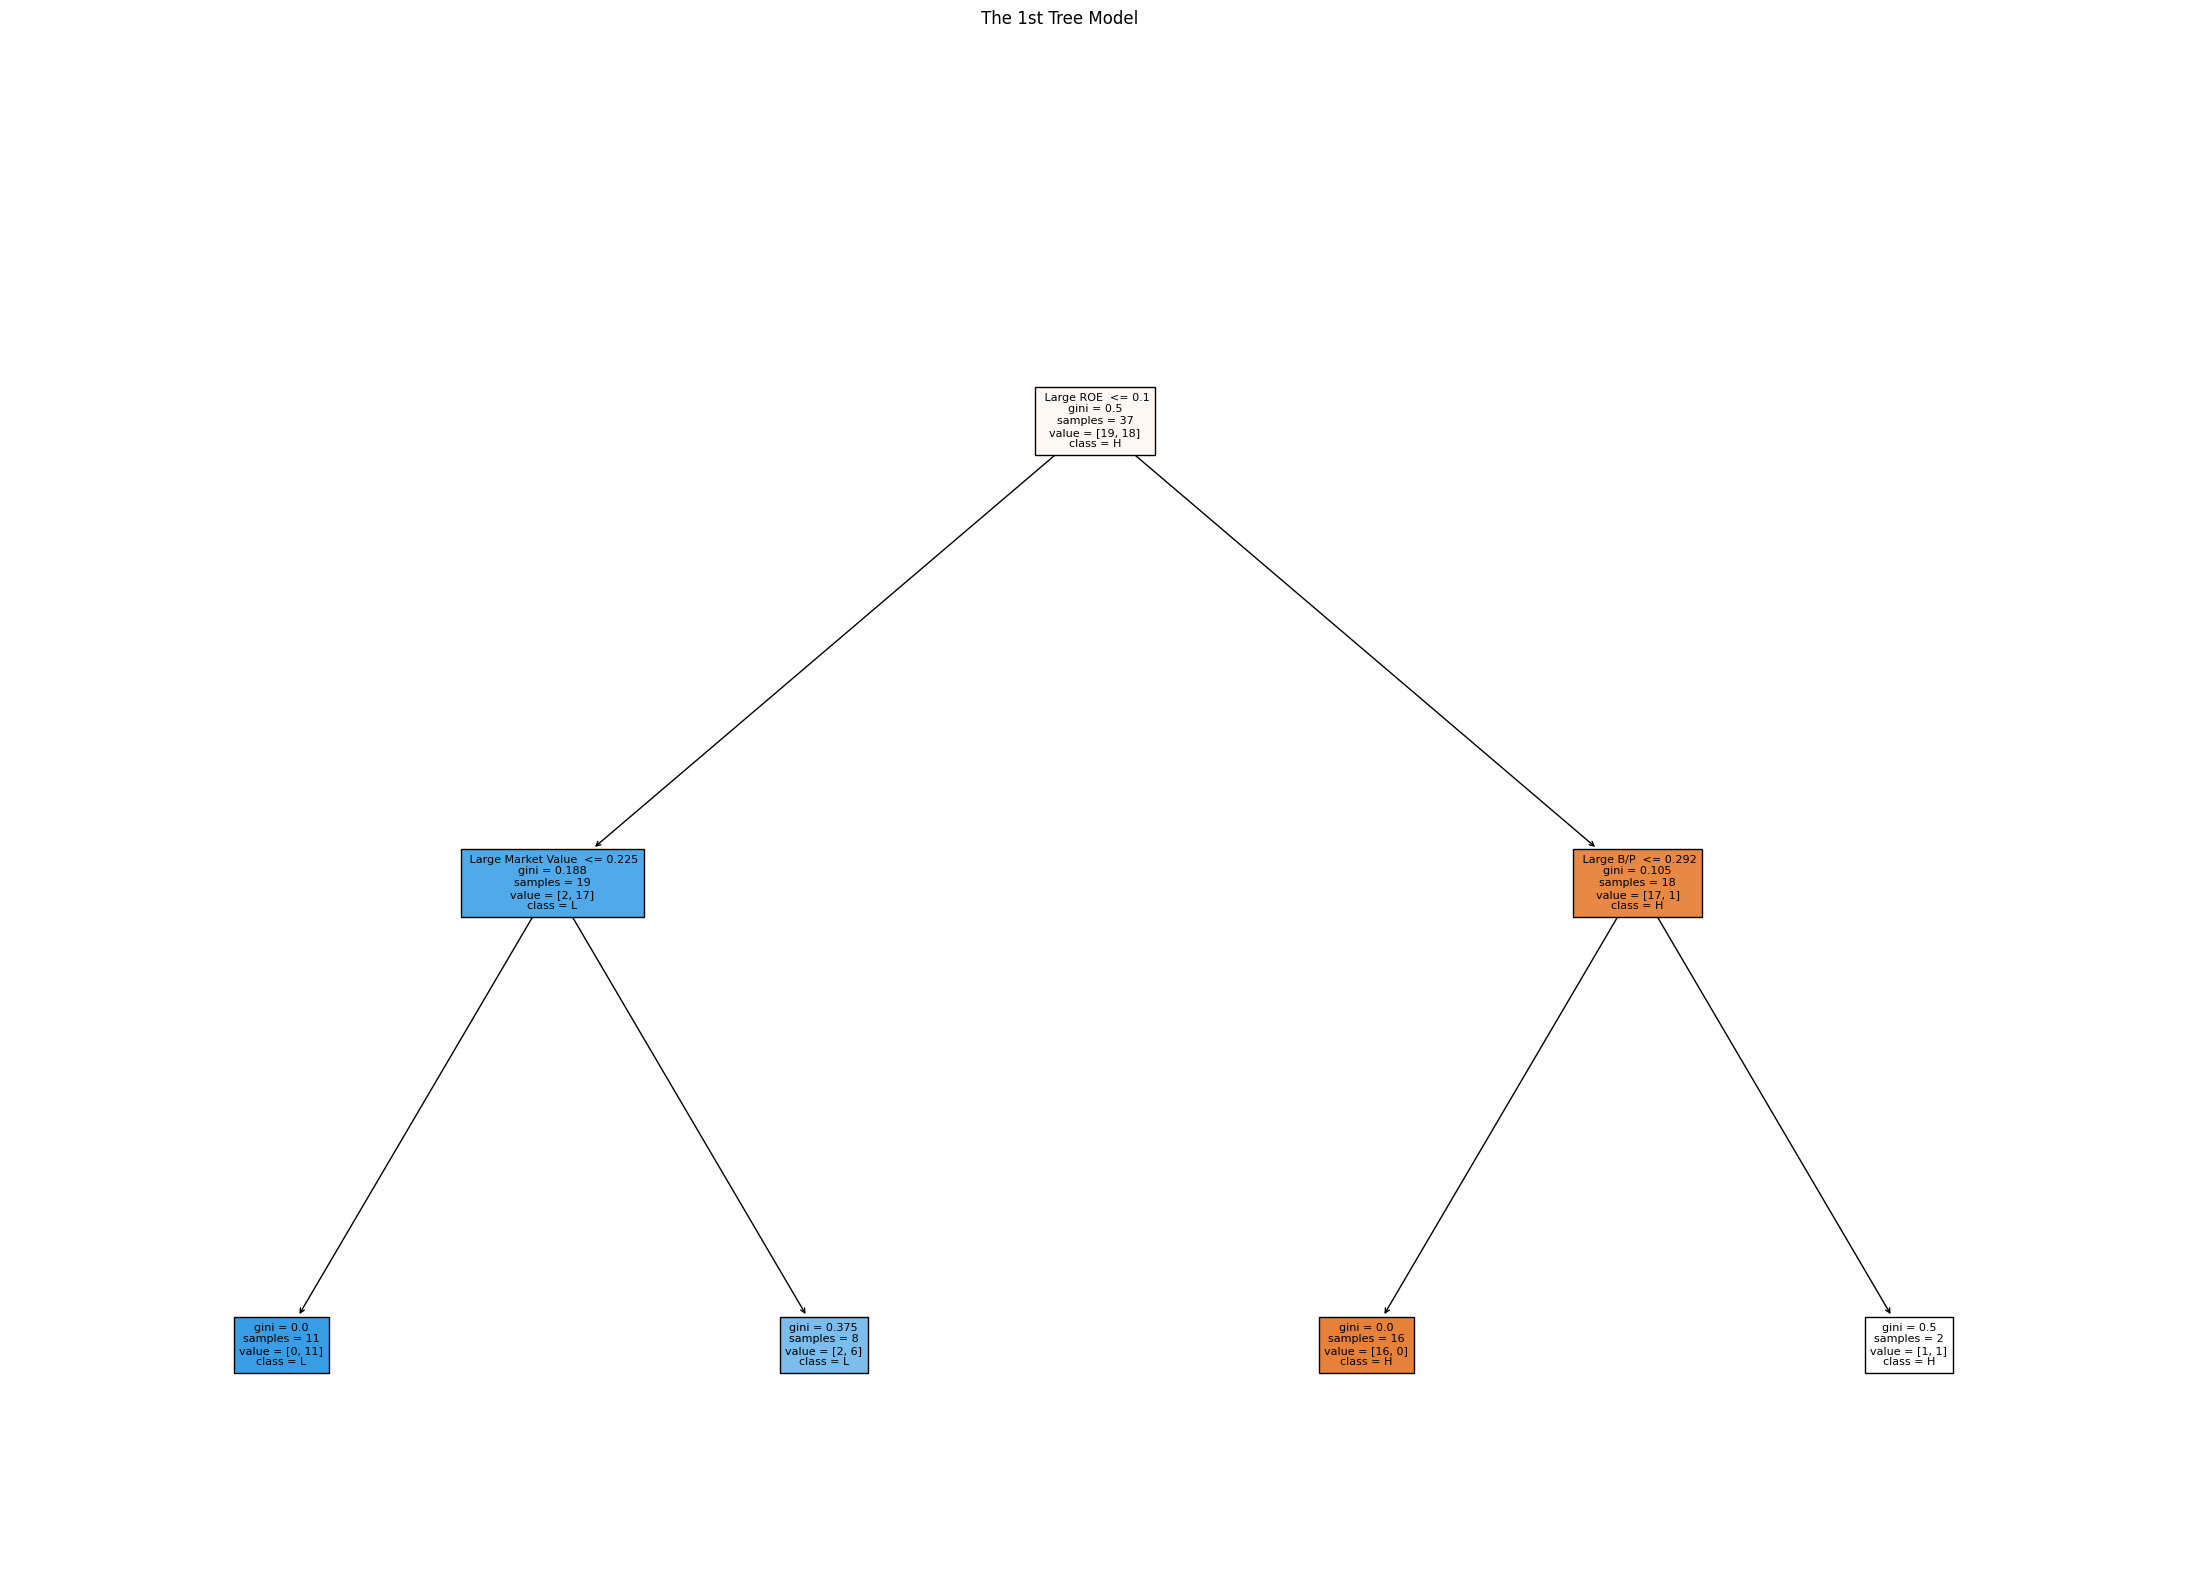

In [563]:
fig = plt.figure(figsize=(28,18))    

tree.plot_tree(clf, 
               feature_names = X2_train.columns.to_list(),  # Feature name
               class_names = ['H','L'],             # Target value names in ascending numerical order.
               filled = True,                              # if True, paint nodes to indicate majority class  
               fontsize = 8);   

fig.suptitle('The 1st Tree Model'); 

In [564]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [565]:
from sklearn.metrics import confusion_matrix


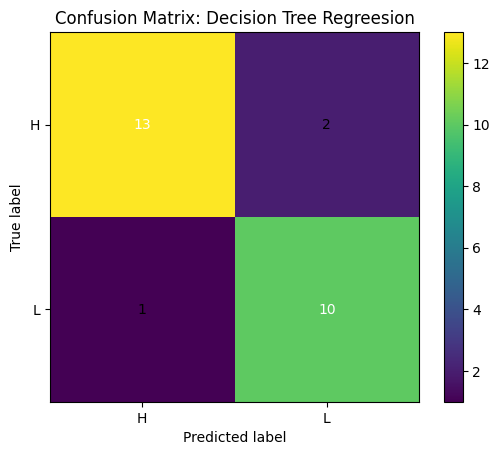

In [566]:
from scikitplot.metrics import plot_confusion_matrix

plot_confusion_matrix(y_true = y2_test, 
                      y_pred = y2_pred_dt2, 
                      cmap = 'viridis',    # Choose a prefered color map
                      title = 'Confusion Matrix: Decision Tree Regreesion'); 

In [567]:
tn1, fp1, fn1, tp1 = confusion_matrix(y2_test, y2_pred_dt2).ravel()
print('\nConfusion Matrix:')
print('TN=',tn1, 'FP=', fp1, 'FN=', fn1, 'TP=', tp1)
print('Recall/Sensitivity= ',round(tp1/(tp1+fn1),3))
print('Specificity= ', round(tn1/(tn1+fp1),3))
print('Precision= ', round(tp1/(tp1+fp1),3))


Confusion Matrix:
TN= 13 FP= 2 FN= 1 TP= 10
Recall/Sensitivity=  0.909
Specificity=  0.867
Precision=  0.833


In [568]:
dt_prob = clf.predict_proba(X2_test)

dt_prob 

array([[1.  , 0.  ],
       [0.  , 1.  ],
       [0.25, 0.75],
       [1.  , 0.  ],
       [0.25, 0.75],
       [0.5 , 0.5 ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.5 , 0.5 ],
       [1.  , 0.  ],
       [0.25, 0.75],
       [0.25, 0.75],
       [0.5 , 0.5 ],
       [1.  , 0.  ],
       [0.25, 0.75],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.25, 0.75],
       [0.25, 0.75],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [569]:
from sklearn.metrics import roc_curve 
 
fpr_dt, tpr_dt, thresholds = roc_curve(y_true = y2_test, 
                                       y_score = dt_prob[:,0], 
                                       pos_label = 'H')    # col 1 refers to "LEAVE"

display(fpr_dt, tpr_dt, thresholds)     # thresholds:  f(x) values

array([0.        , 0.09090909, 0.09090909, 0.54545455, 1.        ])

array([0.        , 0.66666667, 0.86666667, 1.        , 1.        ])

array([2.  , 1.  , 0.5 , 0.25, 0.  ])

In [570]:
from sklearn.metrics import auc
 
auc_dt = auc(x = fpr_dt, y = tpr_dt)

auc_dt

0.9090909090909091

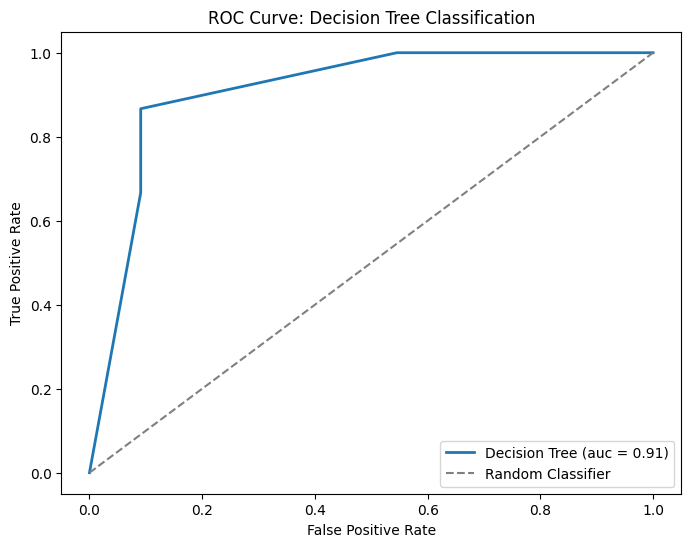

In [571]:
plt.figure(figsize = (8, 6))
plt.plot(fpr_dt, tpr_dt, lw= 2, label='Decision Tree (auc = {:0.2f})'.format(auc_dt))    # ROC curve
plt.plot([0, 1], [0, 1], color='grey', lw= 1.5, linestyle='--', label = 'Random Classifier')   # Diagonal Line 
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('ROC Curve: Decision Tree Classification', fontsize= 12)
plt.legend(loc='lower right', fontsize=10); 

# Ridge regression


In [572]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [573]:


# Perform Min-Max scaling on the feature data
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.fit_transform(X_test)
# X_scaled = scaler.fit_transform(X)

In [574]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create Ridge regression model
ridge = Ridge()

# Perform GridSearchCV to find the best alpha
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=7)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)  # Fit the model on training data

# Get the best alpha and its corresponding score
best_alpha = grid_search.best_params_['alpha']
best_score = grid_search.best_score_

print("Best alpha:", best_alpha)
print("Best score:", best_score)

Best alpha: 1
Best score: 0.45112127929113116


In [575]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Instantiate the Ridge regression model
alpha = 0.1 
ridge_model = Ridge(alpha=alpha)

# Fit the Ridge model to the training data
ridge_model.fit(X_train, y_train)

# Get the coefficients (weights) of the features
feature_weights = ridge_model.coef_

# Perform cross-validation to evaluate the model
cv_scores = cross_val_score(ridge_model, X, y, cv=7)  # Use 5-fold cross-validation
mean_cv_score = np.mean(cv_scores)

# Print the feature weights and cross-validation score
print("Feature Weights: ")
for i, feature in enumerate(X.columns):
    print(f"{feature}: {feature_weights[i]}")
print(f"Mean Cross-Validation Score: {mean_cv_score}")

Feature Weights: 
 Large B/P : -0.15385071002143746
 Large ROE : 0.4108579818693898
 Large S/P : -0.051073896494337
 Large Return Rate in the last quarter : -0.18430730916554672
 Large Market Value : 0.04164889327517006
 Small systematic Risk: -0.06289234349895874
Mean Cross-Validation Score: 0.3288928034271577


In [576]:
ridge_model

Ridge(alpha=0.1)

In [577]:
weights = ridge_model.coef_


In [578]:
# Normalize the weights to add up to 1
weights_normalized = weights / np.sum(weights)

print(" weights:", weights)

 weights: [-0.15385071  0.41085798 -0.0510739  -0.18430731  0.04164889 -0.06289234]


In [579]:
cv_scores = -cv_scores
mse_mean = np.mean(cv_scores) # mean of MSE scores
mse_std = np.std(cv_scores) # standard deviation of MSE scores

# Calculate R-squared scores
r2_scores = cross_val_score(ridge, X, y, cv=7, scoring='r2') # R-squared scores
r2_mean = np.mean(r2_scores) # mean of R-squared scores
r2_std = np.std(r2_scores) # standard deviation of R-squared scores

# Print the MSE and R-squared scores
print("Mean MSE:", mse_mean)
print("Standard deviation of MSE:", mse_std)
print("Mean R-squared:", r2_mean)
print("Standard deviation of R-squared:", r2_std)

Mean MSE: -0.3288928034271577
Standard deviation of MSE: 0.40050329029481424
Mean R-squared: 0.35623234348873584
Standard deviation of R-squared: 0.3047723679479774


In [580]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Compute the mean squared error and R^2 score
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Print the results
print('Mean squared error:', mse_ridge)
print('Coefficient of determination (R^2):', r2_ridge)

Mean squared error: 0.01709496501767319
Coefficient of determination (R^2): 0.33104574365591743


## Logistic regression

In [581]:
from sklearn.linear_model import LogisticRegression

In [582]:
logreg = LogisticRegression()

# Define the hyperparameter grid
param_grid = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

# Perform grid search with 5-fold cross-validation
grid_search_logi = GridSearchCV(logreg, param_grid, cv=7)

# Fit the grid search to the data
grid_search_logi.fit(X2_train, y2_train)

# Print the best hyperparameters and the corresponding score
print("Best hyperparameters for logistic: ", grid_search_logi.best_params_)
print("Best score for logistic: ", grid_search_logi.best_score_)

Best hyperparameters for logistic:  {'C': 1, 'penalty': 'l2'}
Best score for logistic:  0.8666666666666666


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solver lb

In [583]:
logi = LogisticRegression(penalty='l2', C = 1)

logi_cv = cross_val_score(estimator = logi,X = X2, y = y2, cv=7)   # entire data

display(logi_cv, logi_cv.mean(), logi_cv.std())

array([0.77777778, 0.66666667, 0.88888889, 0.77777778, 1.        ,
       0.88888889, 0.88888889])

0.8412698412698413

0.10038976698947236

In [584]:
logi = LogisticRegression(penalty='l2', C = 1).fit(X2_train, y2_train)   # fit the model

display(logi.intercept_, logi.coef_, logi.feature_names_in_) 

array([-0.02913534])

array([[ 0.69673858, -1.92458326,  0.2332224 ,  0.49668288,  0.05102237,
         0.44679432]])

array([' Large B/P ', ' Large ROE ', ' Large S/P ',
       ' Large Return Rate in the last quarter ', ' Large Market Value ',
       ' Small systematic Risk'], dtype=object)

In [585]:
y2_pred_logi = logi.predict(X_test)

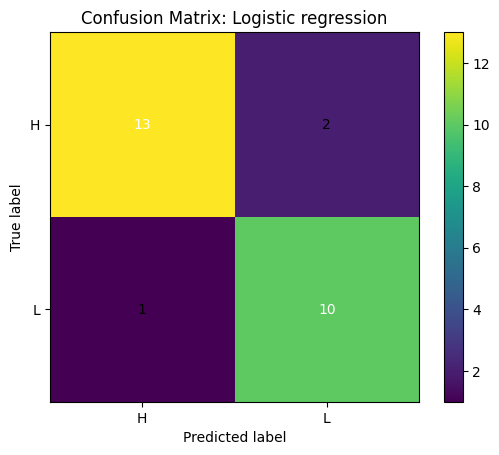

In [586]:
from scikitplot.metrics import plot_confusion_matrix

plot_confusion_matrix(y_true = y2_test, 
                      y_pred = y2_pred_logi, 
                      cmap = 'viridis',    # Choose a prefered color map
                      title = 'Confusion Matrix: Logistic regression');

In [587]:
tn2, fp2, fn2, tp2 = confusion_matrix(y2_test, y2_pred_logi).ravel()
print('\nConfusion Matrix:')
print('TN=',tn2, 'FP=', fp2, 'FN=', fn2, 'TP=', tp2)
print('Recall/Sensitivity= ',round(tp2/(tp2+fn2),3))
print('Specificity= ', round(tn2/(tn2+fp2),3))
print('Precision= ', round(tp2/(tp2+fp2),3))


Confusion Matrix:
TN= 13 FP= 2 FN= 1 TP= 10
Recall/Sensitivity=  0.909
Specificity=  0.867
Precision=  0.833


In [588]:
lr_prob = logi.predict_proba(X2_test)

lr_prob 

array([[0.5383297 , 0.4616703 ],
       [0.39428772, 0.60571228],
       [0.41465729, 0.58534271],
       [0.56504339, 0.43495661],
       [0.43099441, 0.56900559],
       [0.60372662, 0.39627338],
       [0.60911079, 0.39088921],
       [0.39707707, 0.60292293],
       [0.41682586, 0.58317414],
       [0.50728844, 0.49271156],
       [0.33903372, 0.66096628],
       [0.42290166, 0.57709834],
       [0.65544433, 0.34455567],
       [0.52959505, 0.47040495],
       [0.42506057, 0.57493943],
       [0.42616089, 0.57383911],
       [0.58912384, 0.41087616],
       [0.52503585, 0.47496415],
       [0.44527683, 0.55472317],
       [0.56587368, 0.43412632],
       [0.51894202, 0.48105798],
       [0.41574117, 0.58425883],
       [0.40485781, 0.59514219],
       [0.53207999, 0.46792001],
       [0.55381728, 0.44618272],
       [0.58803393, 0.41196607]])

In [589]:
from sklearn.metrics import roc_curve 
 
fpr_lr, tpr_lr, thresholds = roc_curve(y_true = y2_test, 
                                       y_score = lr_prob[:,0], 
                                       pos_label = 'H')    # col 1 refers to "LEAVE"

display(fpr_lr, tpr_lr, thresholds)     # thresholds:  f(x) values

array([0.        , 0.        , 0.        , 0.09090909, 0.09090909,
       0.27272727, 0.27272727, 0.63636364, 0.63636364, 1.        ])

array([0.        , 0.06666667, 0.4       , 0.4       , 0.86666667,
       0.86666667, 0.93333333, 0.93333333, 1.        , 1.        ])

array([1.65544433, 0.65544433, 0.56587368, 0.56504339, 0.50728844,
       0.43099441, 0.42616089, 0.41574117, 0.41465729, 0.33903372])

In [590]:
from sklearn.metrics import auc
 
auc_lr = auc(x = fpr_lr, y = tpr_lr)

auc_lr

0.896969696969697

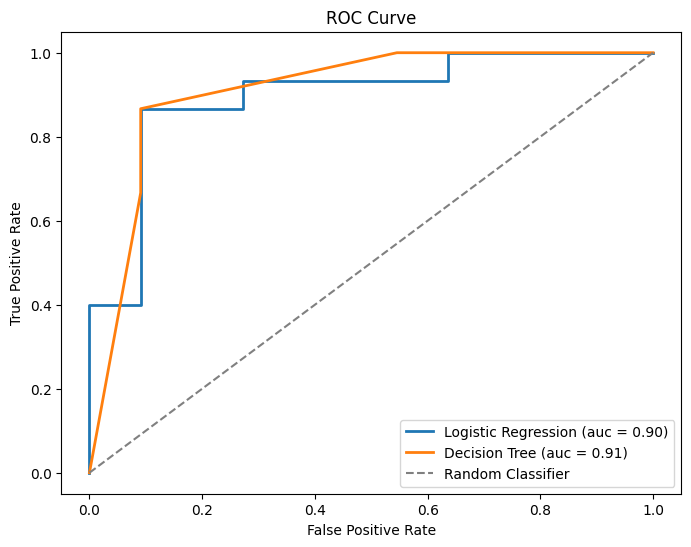

In [591]:
plt.figure(figsize = (8, 6))
plt.plot(fpr_lr, tpr_lr, lw= 2, label='Logistic Regression (auc = {:0.2f})'.format(auc_lr))  
plt.plot(fpr_dt, tpr_dt, lw= 2, label='Decision Tree (auc = {:0.2f})'.format(auc_dt))   # ROC curve
plt.plot([0, 1], [0, 1], color='grey', lw= 1.5, linestyle='--', label = 'Random Classifier')   # Diagonal Line 
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('ROC Curve', fontsize= 12)
plt.legend(loc='lower right', fontsize=10); 

# SVR

In [592]:
from sklearn.svm import SVR,SVC
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [593]:
# Define the SVR model
svr_model = SVR(kernel='linear')

# Define the parameter grid to search over
param_grid = {'C': [0.1, 1, 10, 100, 1000]}

# Perform a grid search using cross-validation
grid_search = GridSearchCV(svr_model, param_grid, cv=7, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Print the best value of C and the corresponding negative mean squared error
print("Best C:", grid_search.best_params_['C'])
print("Negative mean squared error:", grid_search.best_score_)

Best C: 1
Negative mean squared error: -0.012589597158544723


In [594]:
svr = SVR(kernel='linear', C=1)

# Use cross-validation to evaluate the model
cv_scores = cross_val_score(svr, X, y, cv=7, scoring='neg_mean_squared_error')

# Print the mean of the cross-validation scores
print("Mean CV MSE:", abs(np.mean(cv_scores)))


Mean CV MSE: 0.013520356470410356


In [595]:

# Fit the SVR model on the entire dataset
svr.fit(X_train, y_train)

# Extract the coefficients from the model
SVM_weights = svr.coef_

# Normalize the weights to sum to 1
# SVM_weights = weights / np.sum(weights)



In [596]:
# # Print the feature weights
# for i in range(len(X.columns)):
#     print(X.columns[i], ":", weights[i])

In [597]:
SVM_weights

array([[-0.10452976,  0.36101132, -0.05127757, -0.15768411,  0.02225295,
        -0.06977284]])

In [598]:
# Make predictions on the test set
y_pred_SVR = svr.predict(X_test)

# Compute the mean squared error and R^2 score
mse_SVR = mean_squared_error(y_test, y_pred_SVR)
r2_SVR = r2_score(y_test, y_pred_SVR)

# Print the results
print('Mean squared error:', mse_SVR)
print('Coefficient of determination (R^2):', r2_SVR)

Mean squared error: 0.01694539919304986
Coefficient of determination (R^2): 0.336898501756443


## SVC 

In [599]:
X2_train

,Large B/P,Large ROE,Large S/P,Large Return Rate in the last quarter,Large Market Value,Small systematic Risk
46,0.250,0.250,0.250,0.000,0.000,0.250
17,0.000,0.500,0.000,0.000,0.000,0.500
7,0.500,0.000,0.500,0.000,0.000,0.000
60,0.200,0.000,0.200,0.200,0.200,0.200
45,0.000,0.250,0.250,0.250,0.250,0.000
38,0.000,0.333,0.000,0.000,0.333,0.333
37,0.333,0.000,0.000,0.000,0.333,0.333
19,0.000,0.000,0.000,0.500,0.000,0.500
13,0.000,0.500,0.000,0.000,0.500,0.000
1,0.000,1.000,0.000,0.000,0.000,0.000


In [600]:
y2_train

46    H
17    H
7     L
60    L
45    H
38    H
37    L
19    L
13    H
1     H
31    L
4     L
27    H
51    H
22    H
29    H
9     L
16    L
43    H
36    L
57    H
61    H
50    H
14    L
53    L
2     L
34    L
52    H
30    H
10    H
48    L
15    L
23    L
39    L
3     L
24    H
8     H
Name: Rel. Win Rate.1, dtype: object

In [601]:
# Define the decision tree model
SVC_model = SVC(kernel = 'linear')

# Define the hyperparameters to tune
param_range_SVC = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Use GridSearchCV to find the best hyperparameters
grid_search_SVC = GridSearchCV(SVC_model, param_range_SVC, cv=7)
grid_search_SVC.fit(X2_train, y2_train)

# Print the best hyperparameters
print("Best hyperparameters for SVC:", grid_search_SVC.best_params_)
print("Best score for SVC: ", grid_search_SVC.best_score_)


Best hyperparameters for SVC: {'C': 10}
Best score for SVC:  0.9190476190476191


In [602]:
SVC_best = grid_search_SVC.best_estimator_
SVC_best

SVC(C=10, kernel='linear')

In [603]:
SVC = LinearSVC(C = 5)

SVC_cv = cross_val_score(estimator = SVC,X = X2, y = y2, cv=7)   # entire data

display(SVC_cv, SVC_cv.mean(), SVC_cv.std())

array([0.88888889, 0.88888889, 0.88888889, 0.77777778, 1.        ,
       0.88888889, 0.88888889])

0.8888888888888891

0.05939138709164986

In [604]:
SVC.fit(X2_train, y2_train)


LinearSVC(C=5)

In [605]:
# Extract the coefficients from the model
SVC_weights = SVC.coef_

# Normalize the weights to sum to 1
# SVC_weights = weights / np.sum(weights)

In [606]:
SVM_weights

array([[-0.10452976,  0.36101132, -0.05127757, -0.15768411,  0.02225295,
        -0.06977284]])

In [607]:
y2_pred_SVC = SVC.predict(X_test)

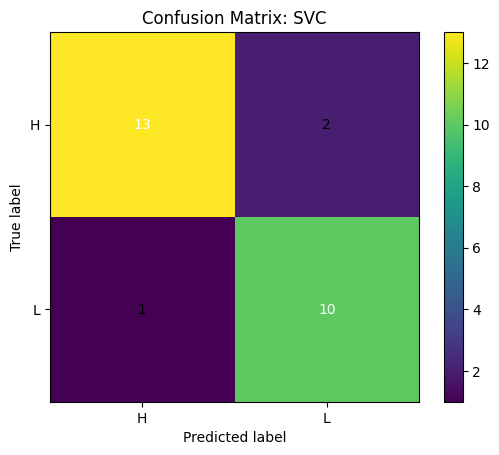

In [608]:
from scikitplot.metrics import plot_confusion_matrix

plot_confusion_matrix(y_true = y2_test, 
                      y_pred = y2_pred_SVC, 
                      cmap = 'viridis',    # Choose a prefered color map
                      title = 'Confusion Matrix: SVC'); 

In [609]:
tn3, fp3, fn3, tp3 = confusion_matrix(y2_test, y2_pred_SVC).ravel()
print('\nConfusion Matrix:')
print('TN=',tn3, 'FP=', fp3, 'FN=', fn3, 'TP=', tp3)
print('Recall/Sensitivity= ',round(tp3/(tp3+fn3),3))
print('Specificity= ', round(tn3/(tn3+fp3),3))
print('Precision= ', round(tp3/(tp3+fp3),3))


Confusion Matrix:
TN= 13 FP= 2 FN= 1 TP= 10
Recall/Sensitivity=  0.909
Specificity=  0.867
Precision=  0.833


In [610]:
svm = LinearSVC()
svm.fit(X2_train,y2_train) 

LinearSVC()

In [611]:
svm_prob = SVC._predict_proba_lr(X2_test)
svm_prob 

array([[0.62165668, 0.37834332],
       [0.31273549, 0.68726451],
       [0.33168109, 0.66831891],
       [0.62936503, 0.37063497],
       [0.35677359, 0.64322641],
       [0.71074544, 0.28925456],
       [0.71657462, 0.28342538],
       [0.28078434, 0.71921566],
       [0.36992857, 0.63007143],
       [0.52888572, 0.47111428],
       [0.25937447, 0.74062553],
       [0.34124315, 0.65875685],
       [0.82137559, 0.17862441],
       [0.58099921, 0.41900079],
       [0.3407124 , 0.6592876 ],
       [0.35632443, 0.64367557],
       [0.70916946, 0.29083054],
       [0.58787276, 0.41212724],
       [0.34383112, 0.65616888],
       [0.64132539, 0.35867461],
       [0.5532351 , 0.4467649 ],
       [0.35056482, 0.64943518],
       [0.33263288, 0.66736712],
       [0.56875716, 0.43124284],
       [0.62802374, 0.37197626],
       [0.69478496, 0.30521504]])

In [612]:
from sklearn.metrics import roc_curve 
 
fpr_svm, tpr_svm, thresholds = roc_curve(y_true = y2_test, 
                                       y_score = svm_prob[:,0], 
                                       pos_label = 'H')    # col 1 refers to "LEAVE"

display(fpr_svm, tpr_svm, thresholds)     # thresholds:  f(x) values

array([0.        , 0.        , 0.        , 0.09090909, 0.09090909,
       0.27272727, 0.27272727, 0.72727273, 0.72727273, 1.        ])

array([0.        , 0.06666667, 0.4       , 0.4       , 0.86666667,
       0.86666667, 0.93333333, 0.93333333, 1.        , 1.        ])

array([1.82137559, 0.82137559, 0.64132539, 0.62936503, 0.52888572,
       0.35677359, 0.35632443, 0.33263288, 0.33168109, 0.25937447])

In [613]:
from sklearn.metrics import auc
 
auc_svm = auc(x = fpr_svm, y = tpr_svm)

auc_svm

0.890909090909091

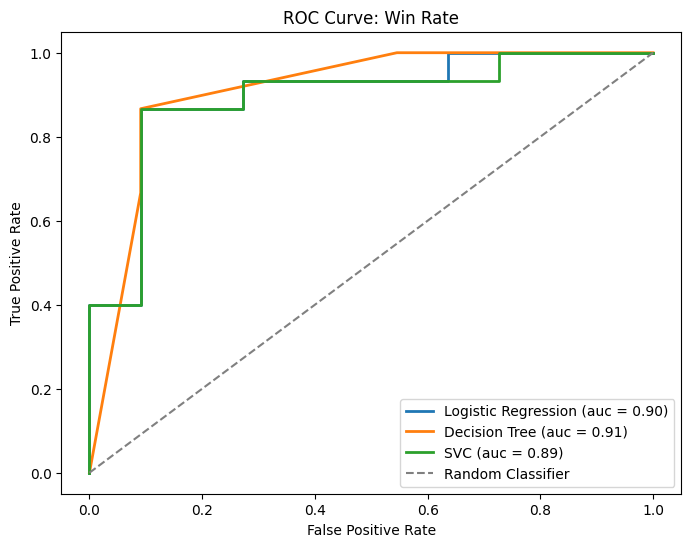

In [614]:
plt.figure(figsize = (8, 6))
plt.plot(fpr_lr, tpr_lr, lw= 2, label='Logistic Regression (auc = {:0.2f})'.format(auc_lr))  
plt.plot(fpr_dt, tpr_dt, lw= 2, label='Decision Tree (auc = {:0.2f})'.format(auc_dt)) 
plt.plot(fpr_svm, tpr_svm, lw= 2, label='SVC (auc = {:0.2f})'.format(auc_svm))  # ROC curve
plt.plot([0, 1], [0, 1], color='grey', lw= 1.5, linestyle='--', label = 'Random Classifier')   # Diagonal Line 
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('ROC Curve: Win Rate', fontsize= 12)
plt.legend(loc='lower right', fontsize=10); 